# Intro:
We're going to see what a winning team looks like statistically with:
- Wins vs losses
- Goals scored vs mediocre team goals scored
- The team attributes

## Import Dependencies

In [84]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.ticker as ticker
import seaborn as sns
import sqlite3
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Data

In [85]:
with sqlite3.connect('database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)

## Merge Data

### Team and Attributes

In [86]:
teamsDF = teams.merge(team_attributes, on=['team_api_id', 'team_fifa_api_id'])
teamsDF.drop(['id_x', 'id_y'], axis=1, inplace=True)
teamsDF.drop_duplicates(subset=['date', 'team_long_name'], inplace = True)
teamsDF.duplicated(subset = ['date', 'team_long_name']).sum()
teamsDF.head(3)

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9987,673.0,KRC Genk,GEN,2010-02-22 00:00:00,45,Balanced,NaN,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover
1,9987,673.0,KRC Genk,GEN,2011-02-22 00:00:00,66,Balanced,NaN,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap
2,9987,673.0,KRC Genk,GEN,2012-02-22 00:00:00,53,Balanced,NaN,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover


In [87]:
teamsDF.shape

(1450, 26)

In [88]:
a, b, c = teams.shape, team_attributes.shape, teamsDF.shape
print('Original "team" shape:            ' + str(a))
print('Original "team attributes" shape: ' + str(b))
print('Modified "teamDF" shape:          ' + str(c))

Original "team" shape:            (299, 5)
Original "team attributes" shape: (1458, 25)
Modified "teamDF" shape:          (1450, 26)


### Country, League, and Match

In [89]:
leaguesDF = countries.merge(leagues, on=['id'])
leaguesDF = leaguesDF.rename(columns={'name_x':'Country', 'name_y':'League'})
leaguesDF.head(3)

,id,Country,country_id,League
0,1,Belgium,1,Belgium Jupiler League
1,1729,England,1729,England Premier League
2,4769,France,4769,France Ligue 1


In [90]:
leaguesDF = leaguesDF.merge(matches, on = ['country_id'])
leaguesDF.sample(3)

,id_x,Country,country_id,League,id_y,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
9284,7809,Germany,7809,Germany 1. Bundesliga,9285,7809,2012/2013,4,2012-09-22 00:00:00,1239503,10189,9823,0,2,1.0,2.0,4.0,6.0,8.0,5.0,2.0,4.0,6.0,8.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,8.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,210822.0,68253.0,101501.0,171698.0,43061.0,145551.0,26437.0,27483.0,128827.0,243164.0,36784.0,27299.0,30894.0,36183.0,38432.0,94886.0,147729.0,30872.0,116772.0,95078.0,30834.0,75447.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,4.0,3.4,1.91,3.8,3.4,1.95,3.7,3.3,1.90,3.75,3.3,1.80,4.05,3.76,1.97,3.8,3.3,2.00,3.75,3.4,1.95,4.00,3.7,1.95,3.8,3.4,1.95,3.8,3.5,1.91
4476,1729,England,1729,England Premier League,4477,1729,2015/2016,17,2015-12-20 00:00:00,1988878,9817,8650,3,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,3.0,5.0,7.0,3.0,5.0,7.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,10.0,10.0,10.0,30455.0,213809.0,40548.0,114769.0,417068.0,25816.0,41365.0,22991.0,37411.0,101419.0,72436.0,157303.0,157838.0,22764.0,94043.0,314605.0,156008.0,95327.0,307021.0,37234.0,242709.0,184536.0,<goal><value><comment>n</comment><stats><goals...,<shoton><value><stats><blocked>1</blocked></st...,<shotoff><value><stats><shotoff>1</shotoff></s...,<foulcommit><value><stats><foulscommitted>1</f...,<card><value><comment>y</comment><stats><ycard...,<cross><value><stats><crosses>1</crosses></sta...,<corner><value><stats><corners>1</corners></st...,<possession><value><comment>34</comment><stats...,4.2,3.6,1.95,4.0,3.3,2.00,3.6,3.3,2.00,3.80,3.4,1.95,4.14,3.55,2.01,4.0,3.2,2.00,NaN,NaN,NaN,4.33,3.4,2.00,NaN,NaN,NaN,NaN,NaN,NaN
8435,7809,Germany,7809,Germany 1. Bundesliga,8436,7809,2010/2011,10,2010-10-30 00:00:00,856961,8722,9790,3,2,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,2.0,4.0,6.0,8.0,4.0,6.0,3.0,5.0,7.0,5.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,1.0,3.0,3.0,3.0,3.0,6.0,6.0,8.0,8.0,8.0,11.0,114211.0,36395.0,97491.0,38215.0,178803.0,38188.0,185336.0,178804.0,34045.0,38848.0,32118.0,24104.0,52243.0,27461.0,37787.0,71017.0,16300.0,39106.0,38216.0,33101.0,212867.0,30496.0,<goal><value><comment>n</comment><stats><goals...,<shoton />,<shotoff />,<foulcommit />,<card><value><comment>y</comment><stats><ycard...,<cross />,<corner />,<possession />,3.7,3.4,2.00,3.3,3.5,2.15,3.3,3.2,2.05,3.75,3.4,2.00,NaN,NaN,NaN,3.6,3.3,2.05,3.40,3.5,2.10,3.80,3.5,2.05,3.5,3.4,2.00,3.6,3.3,2.00


In [91]:
a, b = leaguesDF.shape, matches.shape
print('Modified "leagueDF" shape: ' + str(a))
print('Original "matches" shape:  ' + str(b))

Modified "leagueDF" shape: (25979, 118)
Original "matches" shape:  (25979, 115)


In [92]:
# capture only two columns
temp = teamsDF[['team_api_id', 'team_long_name']]
# rename the column to match other df for key
temp = temp.rename(columns={'team_api_id':'home_team_api_id'}) 
# make sure there's no duplicates
temp.drop_duplicates(subset=['home_team_api_id', 'team_long_name'], inplace = True)
# merge them together on 'home_team_api_id'
leaguesDF = leaguesDF.merge(temp, on=['home_team_api_id'], how='left')
# rename again for away columns
temp = temp.rename(columns={'home_team_api_id':'away_team_api_id'}) 
# merge again
leaguesDF = leaguesDF.merge(temp, on=['away_team_api_id'], how='left')
# drop some useless features
leaguesDF.drop(['id_x', 'id_y', 'country_id', 'league_id', 'stage'], axis=1, inplace=True)
# create a copy of 'leagueDF' to simplify the information even more
leaguesFinal = leaguesDF
leaguesFinal = leaguesFinal[['Country', 'League', 'season', 'date', 'match_api_id', 'team_long_name_x', 
                       'team_long_name_y', 'home_team_goal', 'away_team_goal']]

In [93]:
leaguesFinal = leaguesFinal.rename(columns={'team_long_name_x':'Home Team', 'team_long_name_y':'Away Team'})
leaguesFinal.sample(3)

,Country,League,season,date,match_api_id,Home Team,Away Team,home_team_goal,away_team_goal
16437,Poland,Poland Ekstraklasa,2010/2011,2010-10-16 00:00:00,838465,Lech Poznań,Zagłębie Lubin,0,1
7352,France,France Ligue 1,2014/2015,2015-05-16 00:00:00,1710061,Olympique Lyonnais,Girondins de Bordeaux,1,1
13776,Netherlands,Netherlands Eredivisie,2009/2010,2010-03-28 00:00:00,662507,VVV-Venlo,PSV,2,4


In [94]:
def win(leaguesFinal):
    if leaguesFinal['home_team_goal'] > leaguesFinal['away_team_goal']:
        return leaguesFinal['Home Team']
    elif leaguesFinal['away_team_goal'] > leaguesFinal['home_team_goal']:
        return leaguesFinal['Away Team']
    elif leaguesFinal['home_team_goal'] == leaguesFinal['away_team_goal']:
        return "DRAW"
    
def loss(leaguesFinal):
    if leaguesFinal['home_team_goal'] < leaguesFinal['away_team_goal']:
        return leaguesFinal['Home Team']
    elif leaguesFinal['away_team_goal'] < leaguesFinal['home_team_goal']:
        return leaguesFinal['Away Team']
leaguesFinal["win"] = leaguesFinal.apply(lambda leaguesFinal:win(leaguesFinal),axis=1)
leaguesFinal["loss"] = leaguesFinal.apply(lambda leaguesFinal:loss(leaguesFinal),axis=1)

In [95]:
leaguesFinal.shape

(25979, 11)

In [96]:
leaguesFinal.head(3)

,Country,League,season,date,match_api_id,Home Team,Away Team,home_team_goal,away_team_goal,win,loss
0,Belgium,Belgium Jupiler League,2008/2009,2008-08-17 00:00:00,492473,KRC Genk,Beerschot AC,1,1,DRAW,None
1,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,492474,SV Zulte-Waregem,Sporting Lokeren,0,0,DRAW,None
2,Belgium,Belgium Jupiler League,2008/2009,2008-08-16 00:00:00,492475,KSV Cercle Brugge,RSC Anderlecht,0,3,RSC Anderlecht,KSV Cercle Brugge


## Feature Engineering

### Team Record (Win/Loss) DataFrame

In [106]:
seasons = leaguesFinal['season'].unique()
teams = teamsDF['team_long_name'].unique()
df = []

for i in seasons:
    season = leaguesFinal['season'] == i
    season = leaguesFinal[season]
    for j in teams:
        team_season_wins = season['win'] == j
        team_season_win_record = team_season_wins[team_season_wins].count()
        team_season_loss = season['loss'] == j
        team_season_loss_record = team_season_loss[team_season_loss].count()
        df.append((j, i, team_season_win_record, team_season_loss_record))
df = pd.DataFrame(df, columns=('Team', 'Seasons', 'Wins', 'Losses'))
df = df.rename(columns={'Team':'Home Team'}) 
df2 = leaguesFinal[['Home Team', 'League']]
df2.drop_duplicates(subset = ['Home Team'],inplace = True)
df = df.merge(df2, on = 'Home Team')
df = df.rename(columns={'Home Team':'Team'}) 
teamRecords = df
teamRecords = teamRecords[['League', 'Team', 'Seasons', 'Wins', 'Losses']]
teamRecords = teamRecords[teamRecords.Wins != 0]
teamRecords = teamRecords[teamRecords.Losses != 0]
teamRecords

,League,Team,Seasons,Wins,Losses
0,Belgium Jupiler League,KRC Genk,2008/2009,15,14
1,Belgium Jupiler League,KRC Genk,2009/2010,8,10
2,Belgium Jupiler League,KRC Genk,2010/2011,19,4
3,Belgium Jupiler League,KRC Genk,2011/2012,13,10
4,Belgium Jupiler League,KRC Genk,2012/2013,15,5
5,Belgium Jupiler League,KRC Genk,2013/2014,0,0
6,Belgium Jupiler League,KRC Genk,2014/2015,13,7
7,Belgium Jupiler League,KRC Genk,2015/2016,14,10
8,Belgium Jupiler League,Beerschot AC,2008/2009,11,14
9,Belgium Jupiler League,Beerschot AC,2009/2010,9,11


In [107]:
teamRecords.shape

(1453, 5)

### Team Goals by Season

In [108]:
df = []
home_goals = leaguesFinal.groupby(('Home Team', 'season'))['home_team_goal'].sum()
away_goals = leaguesFinal.groupby(('Away Team', 'season'))['away_team_goal'].sum()
a = home_goals.rename_axis(['Team','season'])
b = away_goals.rename_axis(['Team','season'])
df = (a.add(b, fill_value=0)).reset_index(name='Goals')
df = df.rename(columns={'season':'Seasons'}) 
teamRecords = teamRecords.merge(df, on = ['Team', 'Seasons'], how = 'left')
teamRecords.sort_values(['League', 'Team', 'Seasons'], ascending = True, inplace = True)
teamRecords.shape

(1453, 6)

In [109]:
teamRecords

,League,Team,Seasons,Wins,Losses,Goals
7,Belgium Jupiler League,Beerschot AC,2008/2009,11,14,44
8,Belgium Jupiler League,Beerschot AC,2009/2010,9,11,30
9,Belgium Jupiler League,Beerschot AC,2010/2011,5,14,24
10,Belgium Jupiler League,Beerschot AC,2011/2012,9,12,45
11,Belgium Jupiler League,Beerschot AC,2012/2013,6,19,31
64,Belgium Jupiler League,Club Brugge KV,2008/2009,18,11,59
65,Belgium Jupiler League,Club Brugge KV,2009/2010,17,5,52
66,Belgium Jupiler League,Club Brugge KV,2010/2011,16,9,60
67,Belgium Jupiler League,Club Brugge KV,2011/2012,19,7,51
68,Belgium Jupiler League,Club Brugge KV,2012/2013,15,6,66


### League Winners

In [110]:
# create a df of the team with the best record from each 'League' for each 'Seasons'
teamRecords.sort_values(['League', 'Seasons', 'Wins'], ascending = False, inplace = True)
leagueWinners_season = teamRecords.groupby(['League', 'Seasons']).first()
leagueWinners_season

Team  Wins  Losses  \
League                   Seasons                                           
Belgium Jupiler League   2008/2009          RSC Anderlecht    24       5   
                         2009/2010          RSC Anderlecht    22       3   
                         2010/2011                KRC Genk    19       4   
                         2011/2012          RSC Anderlecht    20       3   
                         2012/2013          RSC Anderlecht    20       3   
                         2013/2014                KAA Gent     3       2   
                         2014/2015          Club Brugge KV    17       3   
                         2015/2016          Club Brugge KV    21       8   
England Premier League   2008/2009       Manchester United    28       4   
                         2009/2010                 Chelsea    27       6   
                         2010/2011       Manchester United    23       4   
                         2011/2012         Manchester City    28       5   
                         2012/2013       Manchester United    28       5   
                         2013/2014         Manchester City    27       6   
                         2014/2015                 Chelsea    26       3   
                         2015/2016          Leicester City    23       3   
France Ligue 1           2008/2009   Girondins de Bordeaux    24       6   
                         2009/2010  Olympique de Marseille    23       6   
                         2010/2011              LOSC Lille    21       4   
                         2011/2012  Montpellier Hérault SC    25       6   
                         2012/2013     Paris Saint-Germain    25       5   
                         2013/2014     Paris Saint-Germain    27       3   
                         2014/2015     Paris Saint-Germain    24       3   
                         2015/2016     Paris Saint-Germain    30       2   
Germany 1. Bundesliga    2008/2009           VfL Wolfsburg    21       7   
                         2009/2010        FC Bayern Munich    20       4   
                         2010/2011       Borussia Dortmund    23       5   
                         2011/2012       Borussia Dortmund    25       3   
                         2012/2013        FC Bayern Munich    29       1   
                         2013/2014        FC Bayern Munich    29       2   
                         2014/2015        FC Bayern Munich    25       5   
                         2015/2016        FC Bayern Munich    28       2   
Italy Serie A            2008/2009                   Inter    25       4   
                         2009/2010                   Inter    24       4   
                         2010/2011                   Milan    24       4   
                         2011/2012                   Milan    23       6   
                         2012/2013                Juventus    27       5   
                         2013/2014                Juventus    33       2   
                         2014/2015                Juventus    26       3   
                         2015/2016                Juventus    29       5   
Netherlands Eredivisie   2008/2009                      AZ    25       4   
                         2009/2010                    Ajax    27       3   
                         2010/2011                    Ajax    22       5   
                         2011/2012                    Ajax    23       4   
                         2012/2013                    Ajax    22       2   
                         2013/2014                    Ajax    20       3   
                         2014/2015                     PSV    29       4   
                         2015/2016                     PSV    26       2   
Poland Ekstraklasa       2008/2009            Wisła Kraków    19       4   
                         2009/2010             Lech Poznań    19       3   
                         2010/2011            Wisła Kraków    17       8   
                         2

In [111]:
leagueWinners_season.shape

(88, 4)

## Visualization

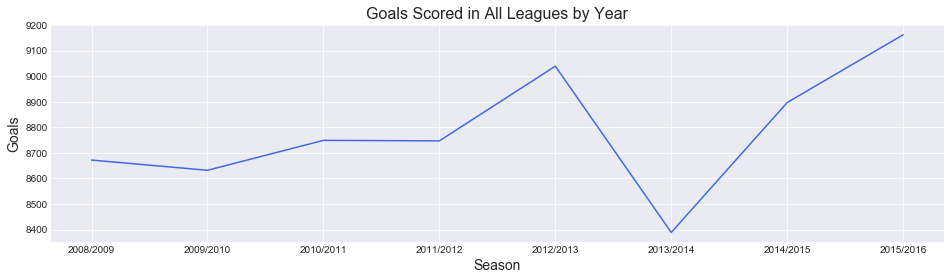

In [112]:
goals_per_year = []
seasons = leaguesFinal['season'].unique()

for i in range(0,8):
    mask = leaguesFinal['season'] == seasons[i]
    goals = leaguesFinal[mask]['home_team_goal'].sum() + leaguesFinal[mask]['away_team_goal'].sum()
    goals_per_year.append(goals)

df = pd.DataFrame([goals_per_year]).transpose()
df['Season'] = ['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013', '2013/2014', '2014/2015', '2015/2016']
df = df.rename(columns = {0 : 'Goals'})

#
sns.set_style("darkgrid")
plt.figure(figsize=(16, 4))
plt.plot(df['Season'], df['Goals'], color = 'royalblue')
plt.ylabel('Goals', fontsize = 14)
plt.xlabel('Season', fontsize = 14)
plt.title('Goals Scored in All Leagues by Year', fontsize = 16)
mpl.rcParams['agg.path.chunksize'] = 10000

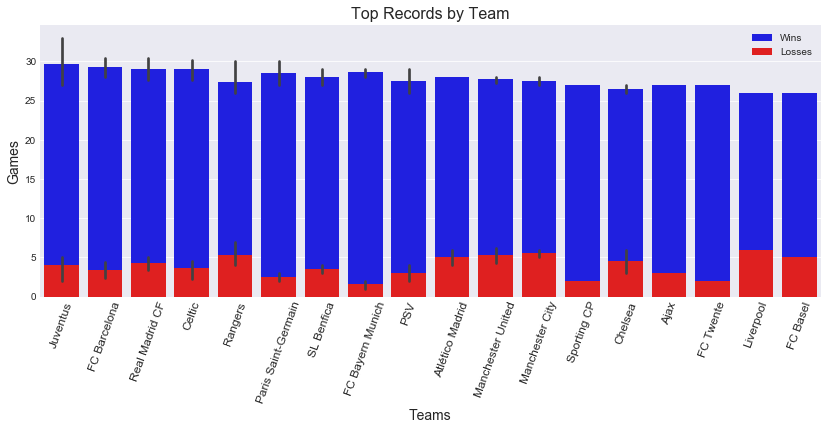

In [113]:
d = teamRecords.sort_values(by = 'Wins', ascending=False)
plt.figure(figsize=(14,5))
sns.barplot('Team', 'Wins', data = d[:50], color = 'b', label = 'Wins')
sns.barplot('Team', 'Losses', data = d[:50], color = 'r', label = 'Losses')
#sns.barplot("team","lost",data=f[:20],color="r",label ="MATCHES LOST")
plt.xticks(rotation = 70, fontsize = 12)
plt.xlabel('Teams', fontsize = 14)
plt.ylabel('Games', fontsize = 14)
plt.legend(loc="best")
plt.title('Top Records by Team', fontsize = 16)
plt.show()

What chart best represents catagories?